In [ ]:
import numpy as np
import plotly.express as px

def plot_from_npz(filename="synchrony_data.npz", width=800, height=600):
    data = np.load(filename)
    Z = data['Z']
    epsilon_vals = data['epsilon_vals']
    p_vals = data['p_vals']

    fig = px.imshow(
        Z,
        x=np.round(epsilon_vals, 3),
        y=np.round(p_vals, 3),
        labels={'x': 'Epsilon (ε)', 'y': 'Connection Probability p', 'color': '<r>'},
        aspect='auto',
        title='',
        width=width,
        height=height
    )

    # Flip y axis so p=0 at bottom
    fig.update_layout(
        yaxis=dict(
            autorange='reversed',
            title_font=dict(size=20, family='Arial Black', color='black')
        ),
        xaxis=dict(
            title_font=dict(size=20, family='Arial Black', color='black')
        ),
        coloraxis_colorbar=dict(
            title_font=dict(size=18, family='Arial Black', color='black')
        ),
        title_font=dict(size=22, family='Arial Black', color='black'),
        font=dict(size=16, family='Arial Black', color='black'),  # tick labels
        margin=dict(l=50, r=50, t=50, b=50)
    )

    fig.show()


# Example usage
plot_from_npz("synchrony_data.npz", width=1000, height=700)




In [ ]:
plot_from_npz("synchrony_data2.npz", width=1000, height=700)

In [ ]:
plot_from_npz("synchrony_data3.npz", width=1000, height=700)

In [ ]:
import numpy as np
import plotly.graph_objects as go

def sync_plot_final_labels(filename, n_curves=20, target_sync=0.99, width=1000, height=600):
    data = np.load(filename)
    Z = data['Z']
    epsilon_vals = data['epsilon_vals']
    p_vals = data['p_vals']

    # Fonts
    curve_label_font = dict(family="Arial Black", size=12, color='black')
    axis_font = dict(family="Arial", size=13, color='black')  # slightly less bold
    red_font = dict(family="Arial Black", size=14, color='red')  # slightly larger red

    # --- Sync vs epsilon (vary p) ---
    p_indices = np.linspace(0, len(p_vals)-1, n_curves, dtype=int)
    fig_eps = go.Figure()

    for idx in p_indices:
        y = Z[idx, :]
        fig_eps.add_trace(go.Scatter(x=epsilon_vals, y=y, mode='lines', line=dict(width=2)))

    # Inline labels for selected curves (first, last, few in-between)
    label_indices = np.linspace(0, len(p_indices)-1, 6, dtype=int)
    for li in label_indices:
        idx = p_indices[li]
        y = Z[idx, :]
        x_pos = 0.46 #epsilon_vals[int(len(epsilon_vals)*0.5)]
        y_pos = y[int(len(epsilon_vals)*0.5)]
        fig_eps.add_annotation(
            x=x_pos, y=y_pos,
            text=f"p={p_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Vertical black dotted line for last curve reaching target_sync
    y_last = Z[p_indices[-1], :]
    reached_idx_last = np.where(y_last >= target_sync)[0]
    if len(reached_idx_last) > 0:
        eps_target_last = epsilon_vals[reached_idx_last[0]]
        fig_eps.add_shape(
            type="line",
            x0=eps_target_last, x1=eps_target_last,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )
        # Red label for last curve line at y=0.45
        fig_eps.add_annotation(
            x=eps_target_last, y=0.45,
            text=f"ε={eps_target_last:.3f}",
            showarrow=False,
            font=red_font,
            xanchor="left", yanchor="middle"
        )
    fig_eps.update_layout(
        title="<r> vs ε for selected p",
        xaxis_title="Epsilon (ε)",
        yaxis_title="<R>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    fig_eps.show()

    # --- Sync vs p (vary epsilon) ---
    eps_indices = np.linspace(0, len(epsilon_vals)-1, n_curves, dtype=int)
    fig_p = go.Figure()

    for idx in eps_indices:
        y = Z[:, idx]
        fig_p.add_trace(go.Scatter(x=p_vals, y=y, mode='lines', line=dict(width=2)))

    # Inline labels for selected curves
    label_indices = np.linspace(0, len(eps_indices)-1, 6, dtype=int)
    for li in label_indices:
        idx = eps_indices[li]
        y = Z[:, idx]
        x_pos = 0.42 #p_vals[int(len(p_vals)*0.1)]
        y_pos = y[int(len(p_vals)*0.1)]
        fig_p.add_annotation(
            x=x_pos, y=y_pos,
            text=f"ε={epsilon_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Label the 10th curve with red text (ε value) slightly larger
    if len(eps_indices) > 11:
        idx10 = eps_indices[11]
        y10 = Z[:, idx10]
        x_pos10 = 0.42 #p_vals[int(len(p_vals)*0.5)]
        y_pos10 = y10[int(len(p_vals)*0.5)]
        fig_p.add_annotation(
            x=x_pos10, y=y_pos10,
            text=f"ε={epsilon_vals[idx10]:.3f}",
            showarrow=False,
            font=red_font
        )

    # Vertical black dotted line for first curve reaching target_sync
    y_first = Z[:, eps_indices[0]]
    reached_idx = np.where(y_first >= target_sync)[0]
    if len(reached_idx) > 0:
        p_target = p_vals[reached_idx[0]]
        fig_p.add_shape(
            type="line",
            x0=p_target, x1=p_target,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )
    fig_p.update_layout(
        title="<R> vs p for selected ε",
        xaxis_title="Connection Probability p",
        yaxis_title="<R>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_p.show()


# Example usage
sync_plot_final_labels("synchrony_data.npz", n_curves=25, target_sync=0.991)


In [ ]:
import numpy as np
import plotly.graph_objects as go

def sync_plot_final_labels_bold(filename, n_curves=20, target_sync=0.99, width=1000, height=600):
    data = np.load(filename)
    Z = data['Z']
    epsilon_vals = data['epsilon_vals']
    p_vals = data['p_vals']

    # Fonts
    curve_label_font = dict(family="Arial Black", size=12, color='black')
    axis_font = dict(family="Arial Black", size=14, color='black')  # Bolder axis/tick labels
    red_font = dict(family="Arial Black", size=14, color='red')  # slightly larger red

    # --- Sync vs epsilon (vary p) ---
    p_indices = np.linspace(0, len(p_vals)-1, n_curves, dtype=int)
    fig_eps = go.Figure()

    for idx in p_indices:
        y = Z[idx, :]
        fig_eps.add_trace(go.Scatter(x=epsilon_vals, y=y, mode='lines', line=dict(width=2)))

    # Inline labels for selected curves (first, last, few in-between)
    label_indices = np.linspace(0, len(p_indices)-1, 6, dtype=int)
    for li in label_indices:
        idx = p_indices[li]
        y = Z[idx, :]
        x_pos = 0.46
        y_pos = y[int(len(epsilon_vals)*0.5)]
        fig_eps.add_annotation(
            x=x_pos, y=y_pos,
            text=f"p={p_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Vertical black dotted line for last curve reaching target_sync
    y_last = Z[p_indices[-1], :]
    reached_idx_last = np.where(y_last >= target_sync)[0]
    if len(reached_idx_last) > 0:
        eps_target_last = epsilon_vals[reached_idx_last[0]]
        fig_eps.add_shape(
            type="line",
            x0=eps_target_last, x1=eps_target_last,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )
        # Red label for last curve line at y=0.45
        fig_eps.add_annotation(
            x=eps_target_last, y=0.45,
            text=f"ε={eps_target_last:.3f}",
            showarrow=False,
            font=red_font,
            xanchor="left", yanchor="middle"
        )

    fig_eps.update_layout(
        title="",
        xaxis_title="Epsilon (ε)",
        yaxis_title="<r>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_eps.show()

    # --- Sync vs p (vary epsilon) ---
    eps_indices = np.linspace(0, len(epsilon_vals)-1, n_curves, dtype=int)
    fig_p = go.Figure()

    for idx in eps_indices:
        y = Z[:, idx]
        fig_p.add_trace(go.Scatter(x=p_vals, y=y, mode='lines', line=dict(width=2)))

    # Inline labels for selected curves
    label_indices = np.linspace(0, len(eps_indices)-1, 6, dtype=int)
    for li in label_indices:
        idx = eps_indices[li]
        y = Z[:, idx]
        x_pos = 0.42
        y_pos = y[int(len(p_vals)*0.1)]
        fig_p.add_annotation(
            x=x_pos, y=y_pos,
            text=f"ε={epsilon_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Label the 10th curve with red text (ε value) slightly larger
    if len(eps_indices) > 11:
        idx10 = eps_indices[11]
        y10 = Z[:, idx10]
        x_pos10 = 0.42
        y_pos10 = y10[int(len(p_vals)*0.5)]
        fig_p.add_annotation(
            x=x_pos10, y=y_pos10,
            text=f"ε={epsilon_vals[idx10]:.3f}",
            showarrow=False,
            font=red_font
        )

    # Vertical black dotted line for first curve reaching target_sync
    y_first = Z[:, eps_indices[0]]
    reached_idx = np.where(y_first >= target_sync)[0]
    if len(reached_idx) > 0:
        p_target = p_vals[reached_idx[0]]
        fig_p.add_shape(
            type="line",
            x0=p_target, x1=p_target,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )

    fig_p.update_layout(
        title="",
        xaxis_title="Connection Probability (p)",
        yaxis_title="<r>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_p.show()


# Example usage
sync_plot_final_labels_bold("synchrony_data.npz", n_curves=25, target_sync=0.991)


In [ ]:
import numpy as np
import plotly.graph_objects as go

def sync_plot_final_labels_bold(filename, n_curves=20, target_sync=0.99, width=1000, height=600):
    data = np.load(filename)
    Z = data['Z']
    epsilon_vals = data['epsilon_vals']
    p_vals = data['p_vals']

    # Fonts
    curve_label_font = dict(family="Arial Black", size=12, color='black')
    axis_font = dict(family="Arial Black", size=14, color='black')  # Bolder axis/tick labels
    red_font = dict(family="Arial Black", size=14, color='red')  # slightly larger red

    # --- Sync vs epsilon (vary p) ---
    p_indices = np.linspace(0, len(p_vals)-1, n_curves, dtype=int)
    fig_eps = go.Figure()

    for idx in p_indices:
        y = Z[idx, :]
        fig_eps.add_trace(go.Scatter(x=epsilon_vals, y=y, mode='lines', line=dict(width=2)))

    # --- INLINE LABELS FOR FIRST PLOT ONLY (4 labels: first, last, two middle) ---
    label_indices = [0, len(p_indices)//3, 2*len(p_indices)//3, len(p_indices)-1]
    for li in label_indices:
        idx = p_indices[li]
        y = Z[idx, :]
        x_pos = 0.46
        y_pos = y[int(len(epsilon_vals)*0.5)]
        fig_eps.add_annotation(
            x=x_pos, y=y_pos,
            text=f"p={p_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Vertical black dotted line for last curve reaching target_sync
    y_last = Z[p_indices[-1], :]
    reached_idx_last = np.where(y_last >= target_sync)[0]
    if len(reached_idx_last) > 0:
        eps_target_last = epsilon_vals[reached_idx_last[0]]
        fig_eps.add_shape(
            type="line",
            x0=eps_target_last, x1=eps_target_last,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )
        # Red label for last curve line at y=0.45
        fig_eps.add_annotation(
            x=eps_target_last, y=0.45,
            text=f"ε={eps_target_last:.3f}",
            showarrow=False,
            font=red_font,
            xanchor="left", yanchor="middle"
        )

    fig_eps.update_layout(
        title="",
        xaxis_title="Epsilon (ε)",
        yaxis_title="<r>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_eps.show()

    # --- Sync vs p (vary epsilon) ---
    eps_indices = np.linspace(0, len(epsilon_vals)-1, n_curves, dtype=int)
    fig_p = go.Figure()

    for idx in eps_indices:
        y = Z[:, idx]
        fig_p.add_trace(go.Scatter(x=p_vals, y=y, mode='lines', line=dict(width=2)))

    # Inline labels for second plot (as before)
    label_indices = np.linspace(0, len(eps_indices)-1, 6, dtype=int)
    for li in label_indices:
        idx = eps_indices[li]
        y = Z[:, idx]
        x_pos = 0.42
        y_pos = y[int(len(p_vals)*0.1)]
        fig_p.add_annotation(
            x=x_pos, y=y_pos,
            text=f"ε={epsilon_vals[idx]:.3f}",
            showarrow=False,
            font=curve_label_font
        )

    # Red label for 10th curve (if exists)
    if len(eps_indices) > 11:
        idx10 = eps_indices[11]
        y10 = Z[:, idx10]
        x_pos10 = 0.42
        y_pos10 = y10[int(len(p_vals)*0.5)]
        fig_p.add_annotation(
            x=x_pos10, y=y_pos10,
            text=f"ε={epsilon_vals[idx10]:.3f}",
            showarrow=False,
            font=red_font
        )

    # Vertical black dotted line for first curve reaching target_sync
    y_first = Z[:, eps_indices[0]]
    reached_idx = np.where(y_first >= target_sync)[0]
    if len(reached_idx) > 0:
        p_target = p_vals[reached_idx[0]]
        fig_p.add_shape(
            type="line",
            x0=p_target, x1=p_target,
            y0=0, y1=target_sync,
            line=dict(color="black", width=2, dash="dot")
        )

    fig_p.update_layout(
        title="",
        xaxis_title="Connection Probability (p)",
        yaxis_title="<r>",
        showlegend=False,
        width=width,
        height=height,
        font=axis_font,
        margin=dict(l=60, r=30, t=50, b=60),
        xaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            tickfont=axis_font,
            titlefont=axis_font,
            gridcolor='lightgrey',
            gridwidth=0.5,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig_p.show()


# Example usage
sync_plot_final_labels_bold("synchrony_data.npz", n_curves=25, target_sync=0.991)


In [ ]:
sync_plot_final_labels_bold("synchrony_data2.npz", n_curves=25, target_sync=0.992)

In [ ]:
sync_plot_final_labels_bold("synchrony_data3.npz", n_curves=25, target_sync=0.984)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_le_gamma_from_file(filename, pdf_prefix="results"):
    """
    Load LE + gamma results from npz file and plot:
      1. λ vs p for multiple N
      2. γ vs p (finite-size scaling)
    Each plot is saved as a separate PDF with balanced aesthetics.
    """

    # Load data
    data = np.load(filename, allow_pickle=True)
    p_values = data["p_values"]
    N_list = data["N_list"]
    all_lambdas = data["all_lambdas"]
    gamma_values = data["gamma_values"]

    # Seaborn style
    sns.set(style="whitegrid")
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10
    })

    # --- Plot λ vs p for multiple N ---
    plt.figure(figsize=(9, 5))
    for i, N in enumerate(N_list):
        plt.plot(p_values, all_lambdas[i], marker='o', label=f'N={N}')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Lyapunov Exponent λ")
    #plt.title("λ vs p for multiple N")
    #plt.legend(title="N")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_lambda.pdf")
    plt.show()
    plt.close()

    # --- Plot γ vs p ---
    plt.figure(figsize=(9, 5))
    plt.plot(p_values, gamma_values, marker='o', color='darkgreen')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Convergence Exponent γ")
    #plt.title("γ vs p (Finite-Size Scaling)")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_gamma.pdf")
    plt.show()
    plt.close()

    print(f"Plots saved as {pdf_prefix}_lambda.pdf and {pdf_prefix}_gamma.pdf")


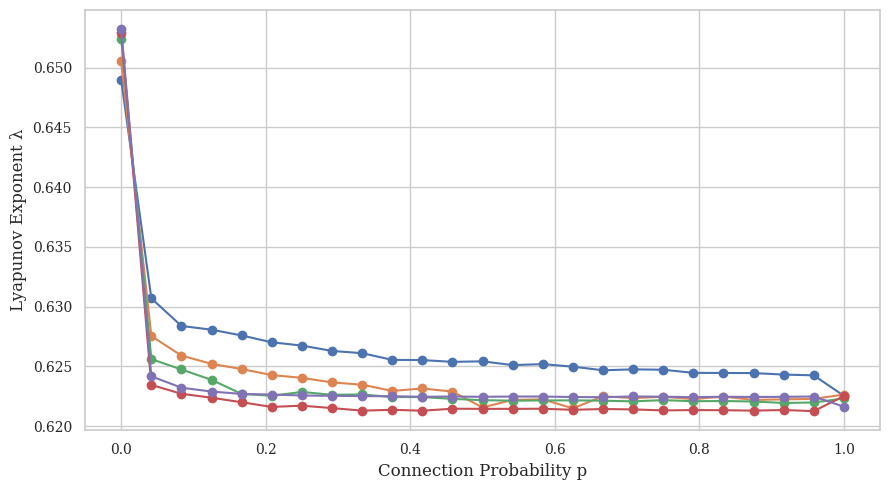

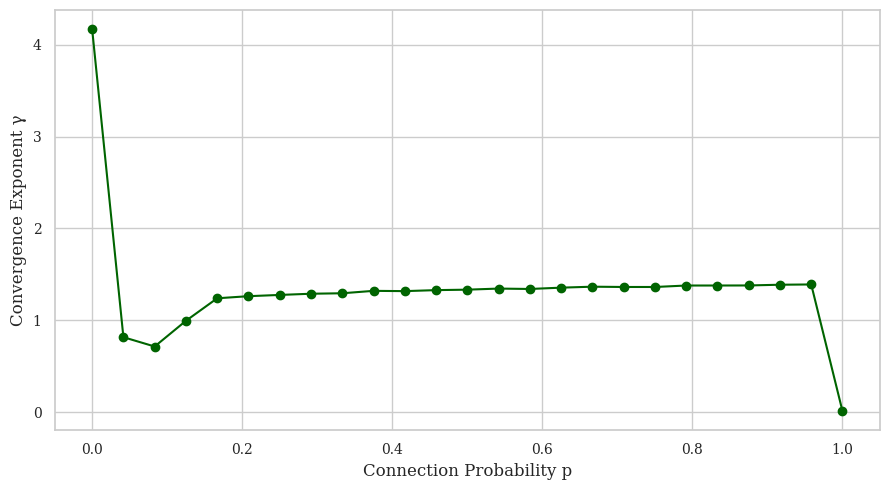

Plots saved as eps03_6400_lambda.pdf and eps03_6400_gamma.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps03_6400.npz", pdf_prefix="eps03_6400")


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps03_6400.npz", pdf_prefix="eps03_6400")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Power-law fit function
def power_law(N, lambda_inf, A, gamma):
    return lambda_inf + A * N**(-gamma)

def plot_le_gamma_from_file(filename, pdf_prefix="results"):
    """
    Load LE + gamma results from npz file and plot:
      1. λ vs p for multiple N
      2. γ vs p (finite-size scaling)
      3. R^2 of power-law scaling fit vs epsilon
    Each plot is saved as a separate PDF.
    """

    # Load data
    data = np.load(filename, allow_pickle=True)
    p_values = data["p_values"]
    N_list = data["N_list"]
    all_lambdas = data["all_lambdas"]
    gamma_values = data["gamma_values"]

    sns.set(style="whitegrid")
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10
    })

    # --- Plot λ vs p for multiple N ---
    plt.figure(figsize=(9, 5))
    for i, N in enumerate(N_list):
        plt.plot(p_values, all_lambdas[i], marker='o', label=f'N={N}')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Lyapunov Exponent λ")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_lambda.pdf")
    plt.show()
    plt.close()

    # --- Plot γ vs p ---
    plt.figure(figsize=(9, 5))
    plt.plot(p_values, gamma_values, marker='o', color='darkgreen')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Convergence Exponent γ")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_gamma.pdf")
    plt.show()
    plt.close()

    # --- Compute and plot R^2 of power-law fit ---
    r2_values = []
    for i, p in enumerate(p_values):
        lambdas_p = np.array([lambdas[i] for lambdas in all_lambdas])
        try:
            popt, _ = curve_fit(power_law, N_list, lambdas_p,
                                bounds=([-1, -10, 0.01], [1, 10, 5]))
            residuals = lambdas_p - power_law(np.array(N_list), *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((lambdas_p - np.mean(lambdas_p))**2)
            r2 = 1 - ss_res / ss_tot
        except Exception:
            r2 = np.nan
        r2_values.append(r2)

    plt.figure(figsize=(9,5))
    plt.plot(p_values, r2_values, marker='o', linestyle='-', color='purple')
    plt.xlabel("Connection Probability p")
    plt.ylabel(r"$R^2$ of Power-Law Fit")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_r2.pdf")
    plt.show()
    plt.close()

    print(f"Plots saved as {pdf_prefix}_lambda.pdf, {pdf_prefix}_gamma.pdf, and {pdf_prefix}_r2.pdf")


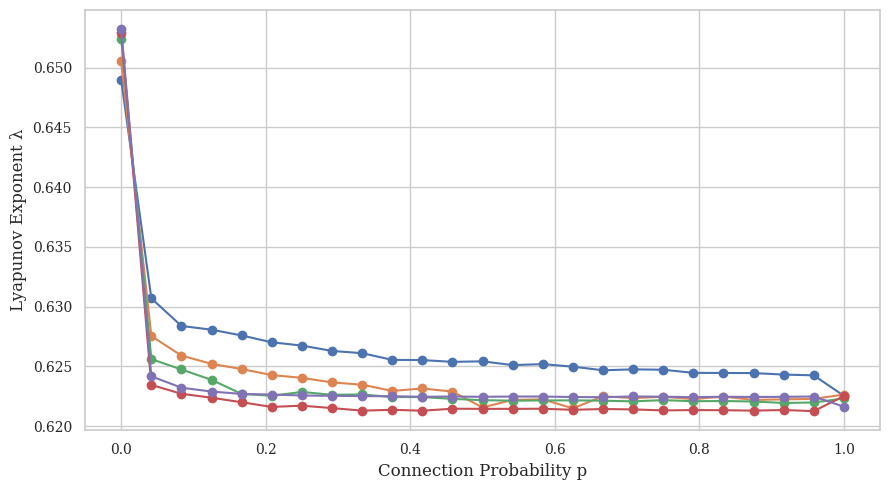

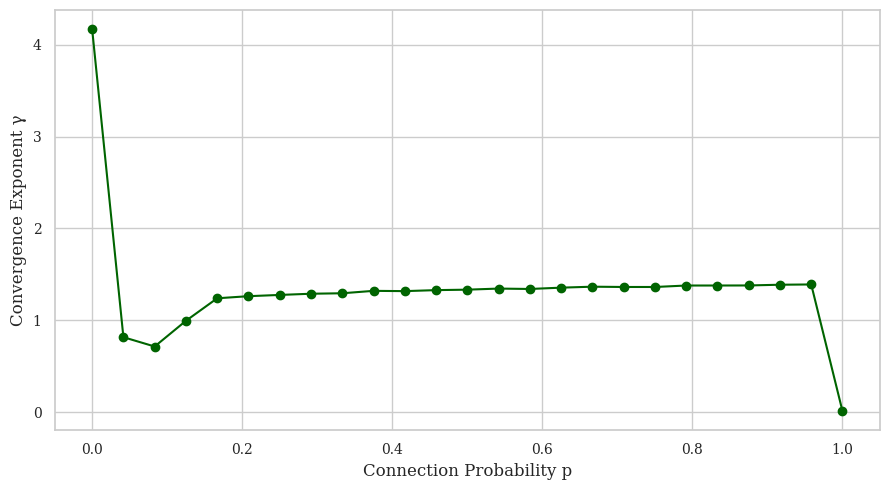

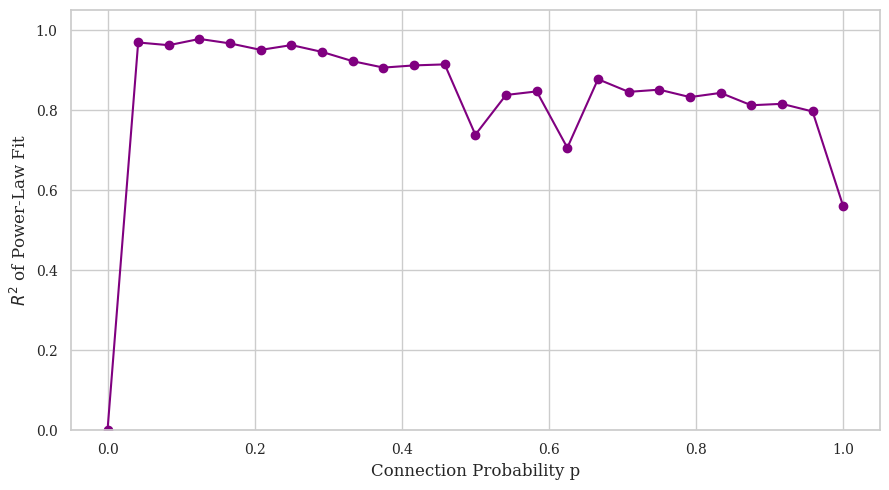

Plots saved as eps03_6400_lambda.pdf, eps03_6400_gamma.pdf, and eps03_6400_r2.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps03_6400.npz", pdf_prefix="eps03_6400")


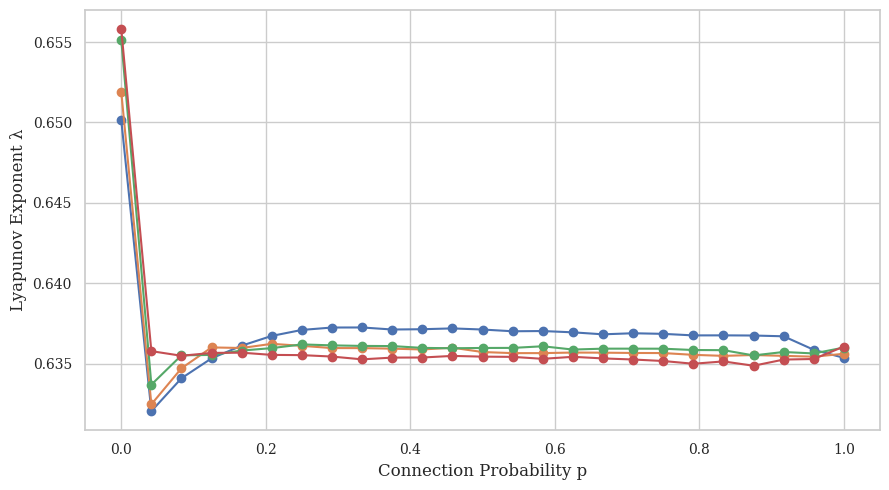

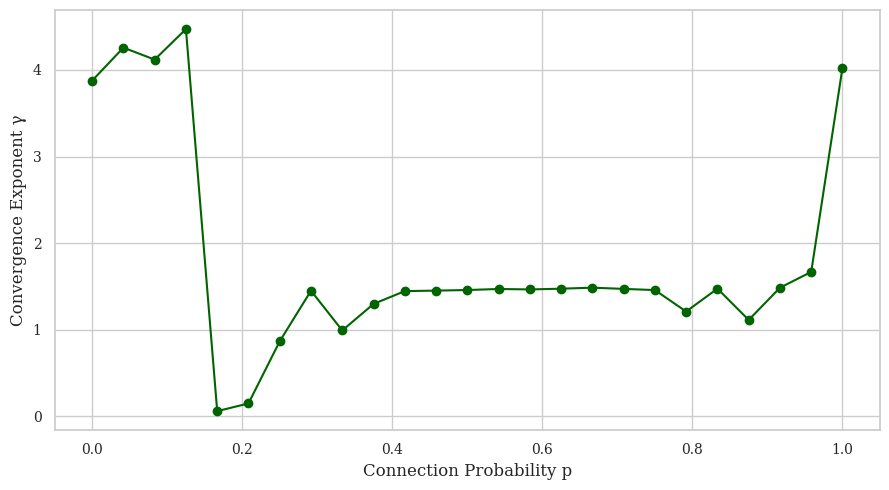

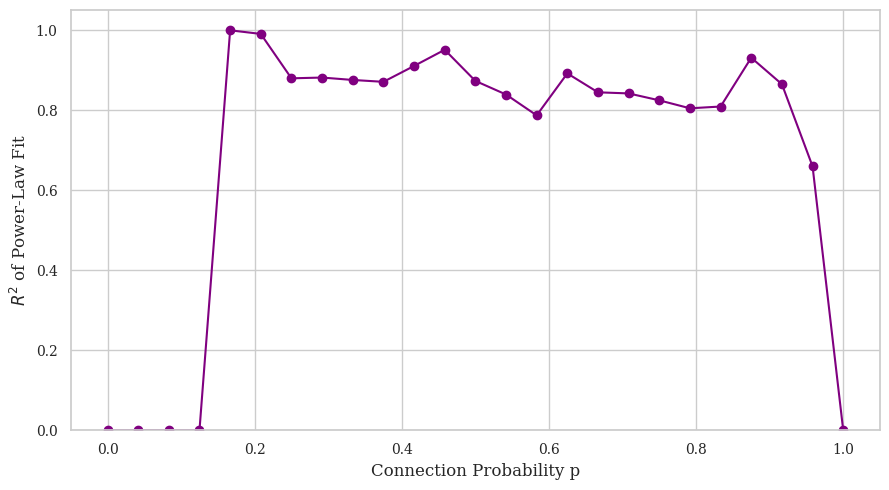

Plots saved as eps043_lambda.pdf, eps043_gamma.pdf, and eps043_r2.pdf


In [ ]:
plot_le_gamma_from_file("le_gamma_results_eps043.npz", pdf_prefix="eps043")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Power-law fit function
def power_law(N, lambda_inf, A, gamma):
    return lambda_inf + A * N**(-gamma)

def plot_le_gamma_from_file(filename, pdf_prefix="results"):
    """
    Load LE + gamma results from npz file and plot:
      1. λ vs p for multiple N (legend shows N sizes)
      2. γ vs p (finite-size scaling)
      3. R^2 of power-law scaling fit vs p
    Each plot is saved as a separate PDF.
    """

    # Load data
    data = np.load(filename, allow_pickle=True)
    p_values = data["p_values"]
    N_list = data["N_list"]
    all_lambdas = data["all_lambdas"]
    gamma_values = data["gamma_values"]

    sns.set(style="whitegrid")
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10
    })

    # --- Plot λ vs p for multiple N with legend showing N sizes ---
    plt.figure(figsize=(9, 5))
    for i, N in enumerate(N_list):
        plt.plot(p_values, all_lambdas[i], marker='o', label=f'N = {N}')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Lyapunov Exponent λ")
    plt.legend(title="System Size N")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_lambda.pdf")
    plt.show()
    plt.close()

    # --- Plot γ vs p ---
    plt.figure(figsize=(9, 5))
    plt.plot(p_values, gamma_values, marker='o', color='darkgreen')
    plt.xlabel("Connection Probability p")
    plt.ylabel("Convergence Exponent γ")
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_gamma.pdf")
    plt.show()
    plt.close()

    # --- Compute and plot R^2 of power-law fit ---
    r2_values = []
    for i, p in enumerate(p_values):
        lambdas_p = np.array([lambdas[i] for lambdas in all_lambdas])
        try:
            popt, _ = curve_fit(power_law, N_list, lambdas_p,
                                bounds=([-1, -10, 0.01], [1, 10, 5]))
            residuals = lambdas_p - power_law(np.array(N_list), *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((lambdas_p - np.mean(lambdas_p))**2)
            r2 = 1 - ss_res / ss_tot
        except Exception:
            r2 = np.nan
        r2_values.append(r2)

    plt.figure(figsize=(9,5))
    plt.plot(p_values, r2_values, marker='o', linestyle='-', color='purple')
    plt.xlabel("Connection Probability p")
    plt.ylabel(r"$R^2$ of Power-Law Fit")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.savefig(f"{pdf_prefix}_r2.pdf")
    plt.show()
    plt.close()

    print(f"Plots saved as {pdf_prefix}_lambda.pdf, {pdf_prefix}_gamma.pdf, and {pdf_prefix}_r2.pdf")
